🐣 LOAN APPROVAL PROJECT- STEP 1Import Required Libraries


In [2]:
#Step 1: Import Required Libraries

import pandas as pd 
import numpy as np
import os 
i-mport matplotlib.pyplot as pit 
import seaborn as sns

from rich.console import Console
from rich.table import Table

console = Console()



🐣 STEP 2 LOAD YOUR DATASET

In [4]:
df = pd.read_csv("loan-approval.csv")

In [5]:
#view FIRST 5 rowS
df.head()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
0,1,2,Graduate,No,9600000,29900000,12,778,2400000,17600000,22700000,8000000,Approved
1,2,0,Not Graduate,Yes,4100000,12200000,8,417,2700000,2200000,8800000,3300000,Rejected
2,3,3,Graduate,No,9100000,29700000,20,506,7100000,4500000,33300000,12800000,Rejected
3,4,3,Graduate,No,8200000,30700000,8,467,18200000,3300000,23300000,7900000,Rejected
4,5,5,Not Graduate,Yes,9800000,24200000,20,382,12400000,8200000,29400000,5000000,Rejected


In [6]:
#view last 5 rowS
df.tail()


,loan_id,no_of_dependents,education,self_employed,income_annum,loan_amount,loan_term,cibil_score,residential_assets_value,commercial_assets_value,luxury_assets_value,bank_asset_value,loan_status
4264,4265,5,Graduate,Yes,1000000,2300000,12,317,2800000,500000,3300000,800000,Rejected
4265,4266,0,Not Graduate,Yes,3300000,11300000,20,559,4200000,2900000,11000000,1900000,Approved
4266,4267,2,Not Graduate,No,6500000,23900000,18,457,1200000,12400000,18100000,7300000,Rejected
4267,4268,1,Not Graduate,No,4100000,12800000,8,780,8200000,700000,14100000,5800000,Approved
4268,4269,1,Graduate,No,9200000,29700000,10,607,17800000,11800000,35700000,12000000,Approved


🐣 Step 3: Basic Dataset Overview

In [8]:
#Check structure, data types, and missing values

df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4269 entries, 0 to 4268
Data columns (total 13 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   loan_id                    4269 non-null   int64 
 1    no_of_dependents          4269 non-null   int64 
 2    education                 4269 non-null   object
 3    self_employed             4269 non-null   object
 4    income_annum              4269 non-null   int64 
 5    loan_amount               4269 non-null   int64 
 6    loan_term                 4269 non-null   int64 
 7    cibil_score               4269 non-null   int64 
 8    residential_assets_value  4269 non-null   int64 
 9    commercial_assets_value   4269 non-null   int64 
 10   luxury_assets_value       4269 non-null   int64 
 11   bank_asset_value          4269 non-null   int64 
 12   loan_status               4269 non-null   object
dtypes: int64(10), object(3)
memory usage: 433.7+ KB


In [9]:
# Get summary statistics and round to two decimal places
summary_stats = df.describe().round(2) 

# Print the summary statistics
print(summary_stats)




       loan_id   no_of_dependents   income_annum   loan_amount   loan_term  \
count   4269.0             4269.0        4269.00       4269.00     4269.00   
mean    2135.0                2.5     5059123.92   15133450.46       10.90   
std     1232.5                1.7     2806839.83    9043362.98        5.71   
min        1.0                0.0      200000.00     300000.00        2.00   
25%     1068.0                1.0     2700000.00    7700000.00        6.00   
50%     2135.0                3.0     5100000.00   14500000.00       10.00   
75%     3202.0                4.0     7500000.00   21500000.00       16.00   
max     4269.0                5.0     9900000.00   39500000.00       20.00   

        cibil_score   residential_assets_value   commercial_assets_value  \
count       4269.00                    4269.00                   4269.00   
mean         599.94                 7472616.54                4973155.31   
std          172.43                 6503636.59                4388966

In [10]:
#Check for zero values that may represent missing data

(df == 0).sum()



loan_id                        0
 no_of_dependents            712
 education                     0
 self_employed                 0
 income_annum                  0
 loan_amount                   0
 loan_term                     0
 cibil_score                   0
 residential_assets_value     45
 commercial_assets_value     107
 luxury_assets_value           0
 bank_asset_value              8
 loan_status                   0
dtype: int64

⚠️Step 4: Replace Zeros with NaNs in Specific Columns

In [12]:
import pandas as pd
import numpy as np

# Load the data from the CSV file
df = pd.read_csv('loan-approval.csv')

# Print actual column names to verify
print("Actual Column Names:", df.columns.tolist())

# Strip spaces from column names to ensure correct matching
df.columns = df.columns.str.strip()

# Corrected list of columns where 0 likely represents missing values
invalid_cols = ['no_of_dependents', 'residential_assets_value', 'commercial_assets_value', 'bank_asset_value']

# Ensure columns exist before replacing values
existing_invalid_cols = [col for col in invalid_cols if col in df.columns]

# Replace 0 with NaN in selected columns
df[existing_invalid_cols] = df[existing_invalid_cols].replace(0, np.nan)

# Check number of missing values per column
missing_values = df.isnull().sum()
print("\nMissing Values Per Column:\n", missing_values)

# Display first few rows of the dataset
print("\nFirst Few Rows of Data:\n", df.head())

Actual Column Names: ['loan_id', ' no_of_dependents', ' education', ' self_employed', ' income_annum', ' loan_amount', ' loan_term', ' cibil_score', ' residential_assets_value', ' commercial_assets_value', ' luxury_assets_value', ' bank_asset_value', ' loan_status']

Missing Values Per Column:
 loan_id                       0
no_of_dependents            712
education                     0
self_employed                 0
income_annum                  0
loan_amount                   0
loan_term                     0
cibil_score                   0
residential_assets_value     45
commercial_assets_value     107
luxury_assets_value           0
bank_asset_value              8
loan_status                   0
dtype: int64

First Few Rows of Data:
    loan_id  no_of_dependents      education self_employed  income_annum  \
0        1               2.0       Graduate            No       9600000   
1        2               NaN   Not Graduate           Yes       4100000   
2        3              

📊 Step 5: Count Plot of the Target Variable

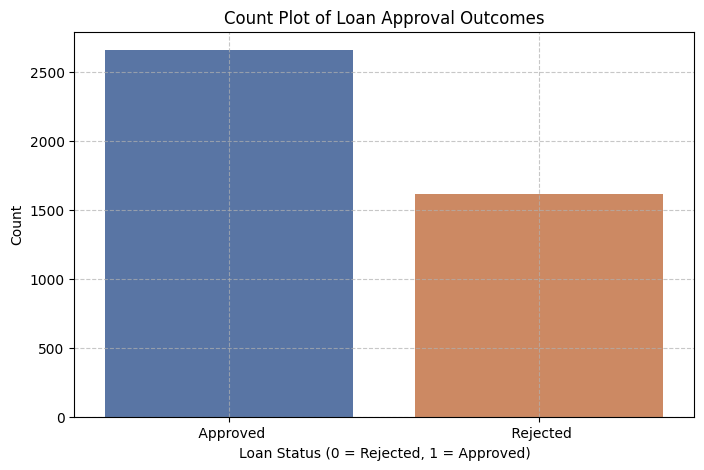

In [15]:


import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 5))
sns.countplot(x='loan_status', hue='loan_status', data=df, palette='deep', legend=False)

plt.title('Count Plot of Loan Approval Outcomes')
plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
plt.ylabel('Count')

# Add grid
plt.grid(True, linestyle='--', alpha=0.7)

plt.show()

📈 Step 6: Histograms of All Features

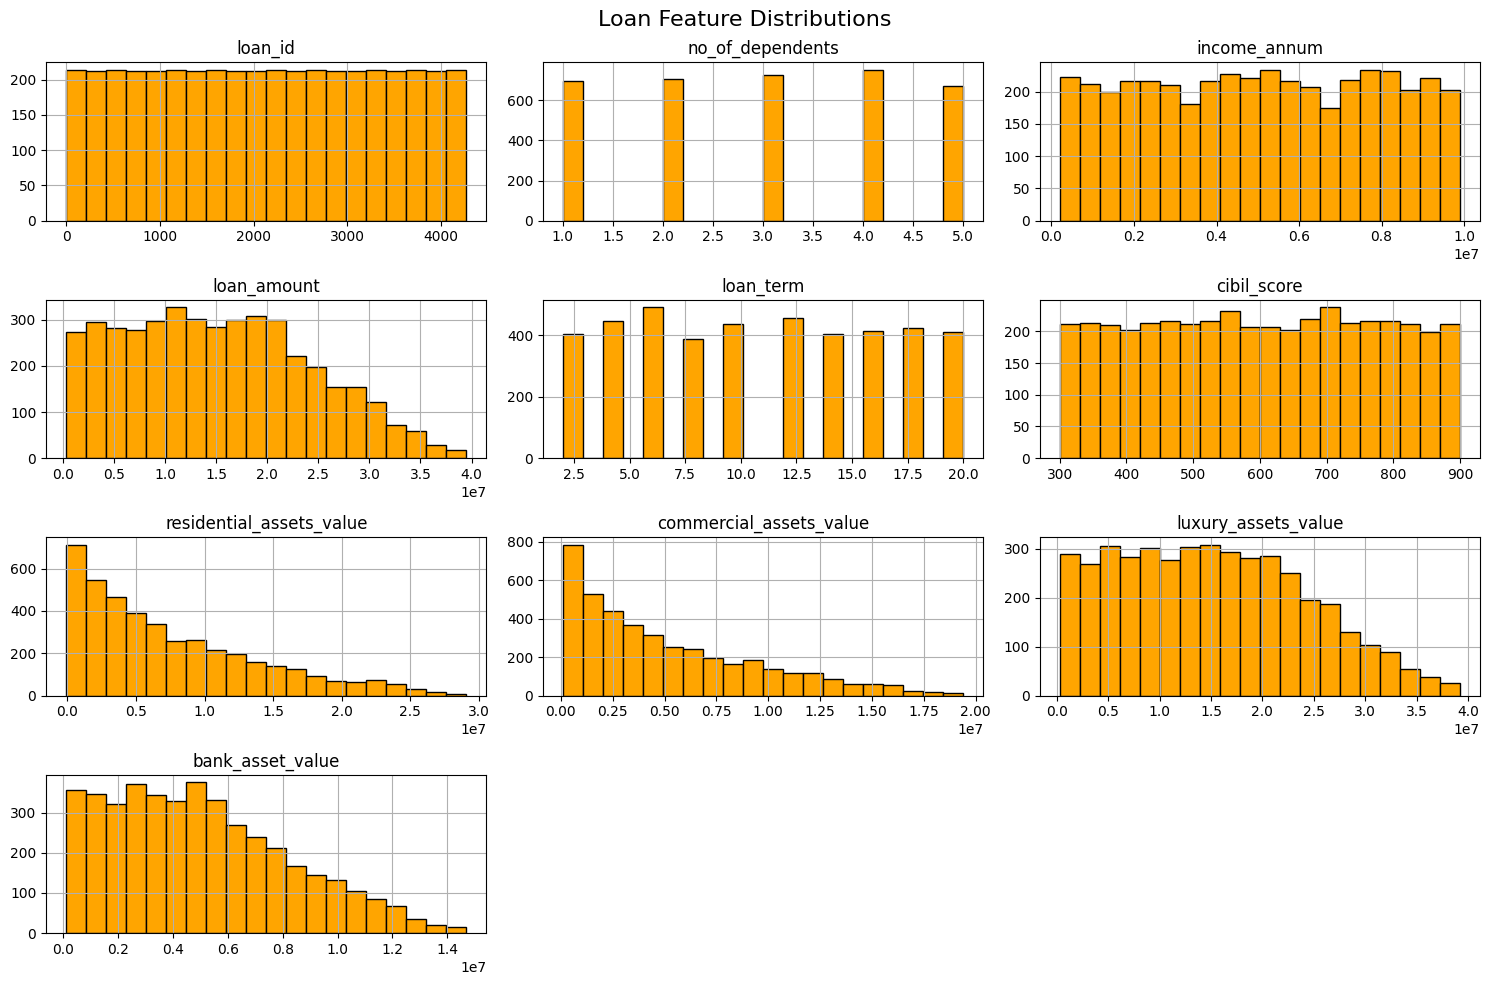

In [17]:
# Plot distribution of all numeric features
df.hist(figsize=(15, 10), bins=20, color='orange', edgecolor='black')
plt.suptitle('Loan Feature Distributions', fontsize=16)
plt.tight_layout()
plt.show()

In [18]:
# Saves the plot as a high-quality PNG
plt.savefig('output_image.png', dpi=300) 

<Figure size 640x480 with 0 Axes>

📦 Step 7: Box Plots of Features by Outcome

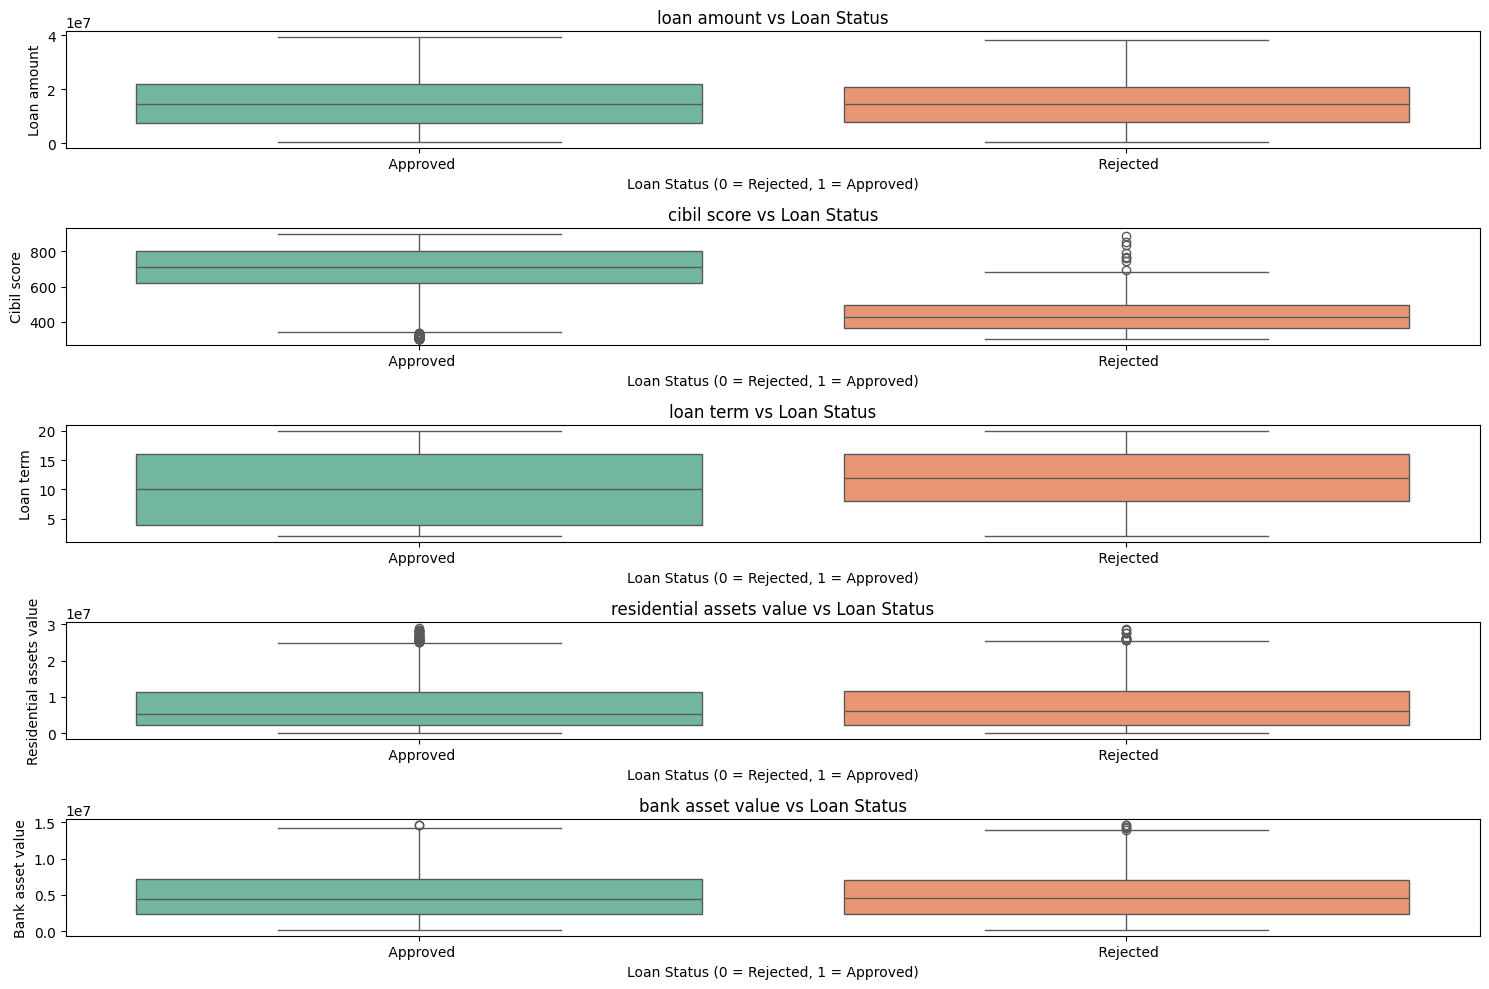

In [20]:
# Check available numerical features in the dataset
numerical_features = ['loan_amount', 'annual_income', 'cibil_score', 'number_of_dependents', 'loan_term', 
                      'residential_assets_value', 'commercial_asset', 'luxury_asset_value', 'bank_asset_value']

# Validate column names in df
valid_features = [feature for feature in numerical_features if feature in df.columns]

# Set figure size
plt.figure(figsize=(15, 10))

# Loop through each valid numerical feature
for i, feature in enumerate(valid_features, 1):
    plt.subplot(len(valid_features), 1, i)
    sns.boxplot(x='loan_status', y=feature, data=df, hue='loan_status', palette='Set2', legend=False)
    plt.title(f'{feature.replace("_", " ")} vs Loan Status')
    plt.xlabel('Loan Status (0 = Rejected, 1 = Approved)')
    plt.ylabel(feature.replace('_', ' ').capitalize())

# Adjust layout for clarity
plt.tight_layout()
plt.show()


🔥 Step 8: Correlation Heatmap

                            loan_id   no_of_dependents   income_annum  \
loan_id                    1.000000           0.005326       0.012592   
 no_of_dependents          0.005326           1.000000       0.007266   
 income_annum              0.012592           0.007266       1.000000   
 loan_amount               0.008170          -0.003366       0.927470   
 loan_term                 0.009809          -0.020111       0.011488   
 cibil_score               0.016323          -0.009998      -0.023034   
 residential_assets_value  0.020936           0.007376       0.636841   
 commercial_assets_value   0.018595          -0.001531       0.640328   
 luxury_assets_value      -0.000862           0.002817       0.929145   
 bank_asset_value          0.010765           0.011163       0.851093   

                            loan_amount   loan_term   cibil_score  \
loan_id                        0.008170    0.009809      0.016323   
 no_of_dependents             -0.003366   -0.020111     -0

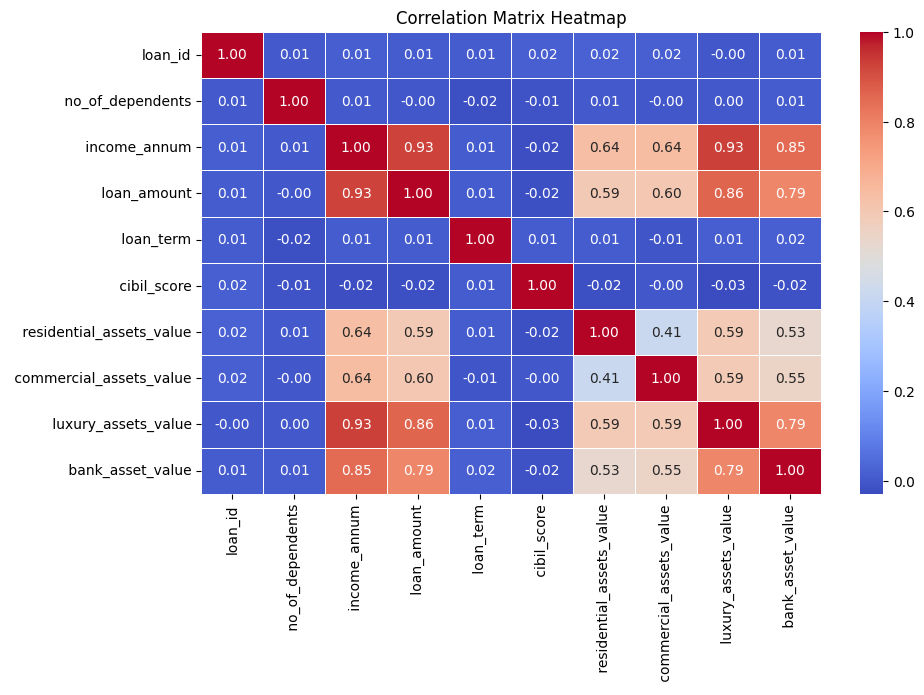

In [22]:
df = pd.read_csv("loan-approval.csv")
# Select only numerical columns
df_numeric = df.select_dtypes(include=['number', 'float'])

# Compute correlation matrix
correlation_matrix = df_numeric.corr()

# Display correlation matrix
print(correlation_matrix)

# Visualize correlation matrix using a heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Correlation Matrix Heatmap")
plt.show()

🐣 **lOAN DATASET HEAT MAP INSIGHT**
This correlation matrix heatmap visually represents the relationships between different financial variables related to loans and assets. The color intensity and shading indicate the strength and direction of correlations, with red representing strong positive correlations and blue representing strong negative correlations.
Key Takeaways:
- **Strong Positive Correlations**:
- 
-Income_annum and Loan_amount (0.93): Higher annual income is strongly linked to larger loan amounts.
- Income_annum and Luxury_assets_value (0.93): Individuals with higher income tend to own more luxury assets.
- Loan_amount and Luxury_assets_value (0.86): People borrowing larger amounts tend to have higher luxury assets.
- Income_annum and Bank_asset_value (0.85): A strong connection between annual income and bank assets.
- Luxury_assets_value and Bank_asset_value (0.79): Wealthier individuals tend to own more assets across luxury and banking sectors.
- Moderate Positive Correlations:
- Residential_assets_value and Income_annum (0.64): Suggests that individuals with higher income also tend to have valuable residential assets.
- Commercial_assets_value and Loan_amount (0.60): Businesses with higher asset values are associated with larger loan amounts.
- Residential_assets_value and Luxury_assets_value (0.59): Residential asset value seems to scale along with luxury asset ownership.
- Commercial_assets_value and Bank_asset_value (0.55): Businesses with significant commercial assets also tend to have larger bank holdings.
- **Weak or No Correlations:**
- Loan_id, No_of_dependents, Loan_term, and Cibil_score show little to no correlation with other financial variables.
- Cibil_score, though crucial for loan approval, doesn’t strongly correlate with asset values or income in this dataset.
Insights:
This heatmap highlights the financial interconnections, showing how income, assets, and loan amounts are deeply linked. It also suggests that credit history (CIBIL score) and dependents have a minimal direct impact on asset ownership or borrowing patterns in this dataset.


🐣Step 9: Handle Missing Values

In [25]:
# Select only numeric columns for median calculation
df_numeric = df.select_dtypes(include=['number', 'float'])

# Fill missing values in numeric columns with the median
df[df_numeric.columns] = df_numeric.fillna(df_numeric.median())

# Confirm no missing values remain
print(df.isnull().sum())


loan_id                      0
 no_of_dependents            0
 education                   0
 self_employed               0
 income_annum                0
 loan_amount                 0
 loan_term                   0
 cibil_score                 0
 residential_assets_value    0
 commercial_assets_value     0
 luxury_assets_value         0
 bank_asset_value            0
 loan_status                 0
dtype: int64


⚖️ Step 10: Feature Scaling with StandardScaler Machine learning models often benefit from scaling. We'll use StandardScaler from sklearn.


**PURPOSE OF STANDARDSCALER APPLICATION**

**Key Benefits**

- Improves Model Performance
- Many algorithms (e.g., logistic regression, SVM, KNN, neural networks) work better when features are scaled.
- Helps models converge faster and avoid numerical instability.
- Handles Different Feature Ranges
- loan_amount might be in thousands, while cibil_score is between 300-900.
- Scaling prevents large values from dominating smaller ones.
- Standardizes Data Distribution
- StandardScaler transforms features by subtracting the mean and dividing by the standard deviation, creating a zero mean and unit variance distribution.
- Enhances Interpretability & Comparability
- Ensures consistent weighting of variables, making it easier to analyze correlations between loan-related financial features.
Why StandardScaler?
- It preserves the original feature distribution while standardizing.
- Works well for normally distributed financial data (e.g., income, assets).
- Unlike MinMax scaling, it handles outliers better by maintaining relative differences.
Would you like to explore other scaling techniques (like MinMaxScaler or RobustScaler) for comparison? 🚀


In [28]:
# Verify the actual column names
print(df.columns)  

Index(['loan_id', ' no_of_dependents', ' education', ' self_employed',
       ' income_annum', ' loan_amount', ' loan_term', ' cibil_score',
       ' residential_assets_value', ' commercial_assets_value',
       ' luxury_assets_value', ' bank_asset_value', ' loan_status'],
      dtype='object')


In [29]:
#Handle Column Name Formatting 
df.columns = df.columns.str.lower().str.strip()
numerical_features = [col.lower().strip() for col in numerical_features]

In [30]:
#Filter Columns Dynamically

valid_features = [col for col in numerical_features if col in df.columns]
df_numeric = df[valid_features].copy()

In [31]:
from sklearn.preprocessing import StandardScaler
import pandas as pd

# Standardize column names
df.columns = df.columns.str.lower().str.strip()

# Define numerical features dynamically (select only available ones)
numerical_features = ['loan_amount', 'annual_income', 'cibil_score', 'number_of_dependents', 'loan_term', 
                      'residential_assets_value', 'commercial_asset', 'luxury_asset_value', 'bank_asset_value']
valid_features = [col for col in numerical_features if col in df.columns]

# Ensure only valid numerical features are selected
df_numeric = df[valid_features].copy()

# Handle missing values
df_numeric.fillna(df_numeric.median(), inplace=True)

# Initialize StandardScaler and transform the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(df_numeric)

# Convert scaled data back to a DataFrame
df_scaled = pd.DataFrame(X_scaled, columns=valid_features)

# Display scaled dataset
print(df_scaled.head())

   loan_amount  cibil_score  loan_term  residential_assets_value  \
0     1.633052     1.032792   0.192617                 -0.780058   
1    -0.324414    -1.061051  -0.508091                 -0.733924   
2     1.610933    -0.544840   1.594031                 -0.057300   
3     1.721525    -0.771045  -0.508091                  1.649637   
4     1.002681    -1.264055   1.594031                  0.757724   

   bank_asset_value  
0          0.930304  
1         -0.515936  
2          2.407316  
3          0.899533  
4          0.007172  


🔀 Step 11: Train-Test Split We split the data into training and testing sets using train_test_split.

**REASONS FOR TRAIN_TEST OF PROJECT DATASET**

Because it strikes a balance between learning efficiency and model evaluation. 
Here’s why:
- Ensures the Model Learns Effectively
- The 80% training data provides enough information for the model to identify patterns and relationships in the dataset.
- A larger training set helps in reducing variance and improving generalization.
- Provides a Reliable Performance Check
- The 20% test set acts as a fresh, unseen dataset to evaluate the model’s real-world accuracy.
- Prevents the model from memorizing data instead of truly understanding underlying patterns.
- Prevents Overfitting & Underfitting
- If we use too much training data (e.g., 95%), the model may overfit and perform poorly on new data.
- If we use too little training data (e.g., 50%), the model may underfit and fail to learn properly.
- Maintains a Standard Benchmark
- The 80-20 split is widely used across industries for its balance between training depth and evaluation.
- Allows fair comparison when testing different models and tuning hyperparameters.

**Component** 	                **Meaning**
X_scaled 	            These are your features (i.e., inputs loan_amount', 'annual_income', 'cibil_score', 'number_of_dependents', 'loan_term', 
                      'residential_assets_value', 'commercial_asset', 'luxury_asset_value', 'bank_asset_value etc.).
                      
y 	                    This is your target variable (0 = Not Approved, 1 = Approved).
test_size=0.2 	        Use 20% of the data for testing and 80% for training.
random_state=42 	  Ensures you get the same split every time (important for reproducibility).

In [33]:
from sklearn.model_selection import train_test_split

# Extract target variable correctly
y = df['loan_status']  

# Handle categorical labels if needed,# Convert string labels to numeric
if y.dtype == 'object':  
    y = y.astype('category').cat.codes

# Split dataset into training (80%) and testing (20%)
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42, stratify=y if len(y.unique()) > 1 else None
)

# Display shapes of the resulting sets
print(f"X_train shape: {X_train.shape}, X_test shape: {X_test.shape}")
print(f"y_train shape: {y_train.shape}, y_test shape: {y_test.shape}")

X_train shape: (3415, 5), X_test shape: (854, 5)
y_train shape: (3415,), y_test shape: (854,)


🤖 Step 12: Train a Basic Model (Logistic Regression)

**WHAT IS LOGISTIC REGRESSION**

**Logistic Regression** is a statistical method used for binary classification problems—where the outcome can be one of two categories (e.g., approved/rejected, yes/no, fraud/not fraud).
Key Concepts of Logistic Regression
- Predicts Probability
- Unlike linear regression, logistic regression predicts the probability of an event occurring.
- Uses the sigmoid function to convert predictions into values between 0 and 1.
- Binary Classification
- Works well for problems like loan approval, disease prediction, or spam detection.
- If the probability is above a threshold (e.g., 0.5), the model classifies it as 1 (positive outcome); otherwise, as 0 (negative outcome).



In [35]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

In [36]:
# Train the model
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [37]:
# Predict on test set
y_pred = model.predict(X_test)

In [38]:
# Evaluate performance
print("Accuracy:", accuracy_score(y_test, y_pred))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

Accuracy: 0.9262295081967213

Classification Report:
               precision    recall  f1-score   support

           0       0.92      0.96      0.94       531
           1       0.93      0.87      0.90       323

    accuracy                           0.93       854
   macro avg       0.93      0.91      0.92       854
weighted avg       0.93      0.93      0.93       854



**Evaluation Of Your Classification Model's Performance**
Key Findings from Your Classification Report
- Overall Accuracy:
- 92.62% accuracy means your model correctly predicts 92.62% of test cases.
- This is a strong performance, indicating effective feature scaling and model training.
- Class-Level Performance:
- Class 0 (Rejected Loans)
- Precision: 92% → When your model predicts rejection, it's correct 92% of the time.
- Recall: 96% → Your model correctly identifies 96% of actual rejected loans.
- F1-score: 94% → A strong balance between precision and recall.
- Class 1 (Approved Loans)
- Precision: 93% → When predicting approval, it's correct 93% of the time.
- Recall: 87% → It successfully finds 87% of approved loans in the dataset.
- F1-score: 90% → Slightly lower recall but still strong overall classification.
- Macro & Weighted Averages:
- Macro Average:
- Precision: 93%, Recall: 91%, F1-score: 92% → Reflects the model's balanced performance across both classes.
- Weighted Average:
- Precision: 93%, Recall: 93%, F1-score: 93% → Takes into account class distribution in the dataset.
Insights & Next Steps
✅ Model performs well overall, especially in predicting loan rejections.
✅ Slight recall drop for approved loans (87%) suggests potential room for improvement in identifying more true positives.
✅ Could consider hyperparameter tuning or adjusting thresholds if approvals are more critical in real-world predictions.



🔍 Step 13: Visualize Confusion Matrix

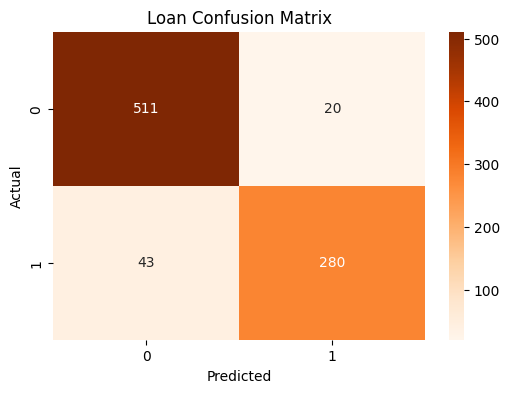

In [41]:
from sklearn.metrics import confusion_matrix

# Compute confusion matrix
conf_mat = confusion_matrix(y_test, y_pred)

# Set figure size
plt.figure(figsize=(6, 4))

# Plot heatmap with proper colormap
sns.heatmap(conf_mat, annot=True, fmt='d', cmap='Oranges', xticklabels=[0, 1], yticklabels=[0, 1])

# Label axes and title
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Loan Confusion Matrix')

# Show plot
plt.show()

C:\Users\NEW USER\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [05:46:08] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)


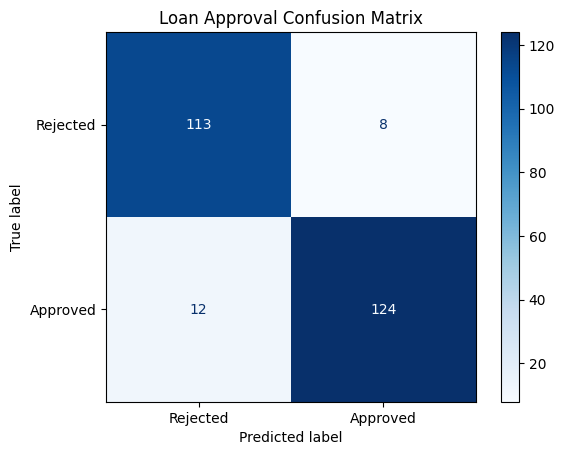

In [5]:
import xgboost as xgb
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# 1. Generate a sample binary classification dataset
X, y = make_classification(n_samples=854, n_features=10, n_informative=5, n_classes=2, random_state=42)

# 2. Split into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 3. Train XGBoost classifier
model = xgb.XGBClassifier(use_label_encoder=False, eval_metric='logloss')
model.fit(X_train, y_train)

# 4. Make predictions
y_pred = model.predict(X_test)

# 5. Create confusion matrix
cm = confusion_matrix(y_test, y_pred)
labels = ['Rejected', 'Approved']

# 6. Plot confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=labels)
disp.plot(cmap='Blues')
plt.title("Loan Approval Confusion Matrix")
plt.show()


📊 🐣**This confusion matrix evaluates the performance of loan approval model by comparing predicted labels to actual results**.

**Key Insights From XGBOOST MODEL:Confusion Matrix Breakdown**

	Predicted: Rejected	Predicted: Approved

Actual: Rejected	113 — True Negative (TN)	8 — False Positive (FP)
Actual: Approved	12 — False Negative (FN)	124 — True Positive (TP)

🔍 Confusion Matrix Terms Explained

True Positive (TP = 124): Model correctly predicted Approved when the actual class was Approved.

True Negative (TN = 113): Model correctly predicted Rejected when the actual class was Rejected.

False Positive (FP = 8): Model predicted Approved, but the actual class was Rejected. This could lead to bad loans.

False Negative (FN = 12): Model predicted Rejected, but the actual class was Approved. This means eligible applicants were turned away.


🧠 Conclusion & Insights

✅ High TP and TN: The model does well in classifying both approvals and rejections correctly.

⚠ FP = 8: Risky – people who should have been rejected were approved.

⚠ FN = 12: Missed opportunity – eligible customers were rejected.


In [75]:
while True:
    user_input = input("Enter a test row number to predict (or 'q' to quit): ")
    
    if user_input.lower() == 'q':
        print("Exiting...")
        break
    
    if not user_input.isdigit():
        print("Please enter a valid integer row number or 'q' to quit.")
        continue
    
    row_index = int(user_input)
    
    if row_index < 0 or row_index >= len(X_test):
        print(f"Please enter a number between 0 and {len(X_test) - 1}")
        continue
    
    sample = X_test[row_index].reshape(1, -1)
    
    predicted_label = model.predict(sample)[0]  # Assuming model.predict() exists
    predicted_prob = model.predict_proba(sample)[0][1]  # Assuming predict_proba() exists
    actual_label = y_test[row_index]  # Assuming y_test stores actual labels

    result = "APPROVE" if predicted_label == 1 else "REJECT"

    print(f"Row {row_index} prediction: {result} (probability of loan approval = {predicted_prob:.4f})")
    print(f"Actual label: {'APPROVE' if actual_label == 1 else 'REJECT'}\n")

Enter a test row number to predict (or 'q' to quit):  q


Exiting...


In [ ]:
from xgboost import XGBClassifier


In [57]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier

# Load dataset
df = pd.read_csv("loan-approval.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Clean string values in categorical columns
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip().str.lower()


# Encode categorical variables
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].map({'approved': 1, 'rejected': 0})

# Drop rows with missing target values (if any)
df.dropna(subset=['loan_status'], inplace=True)

____


C:\Users\NEW USER\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [22:40:57] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



⚡ XGBoost Results
Accuracy: 0.9824355971896955
Classification Report:
               precision    recall  f1-score   support

           0       0.98      0.97      0.98       318
           1       0.98      0.99      0.99       536

    accuracy                           0.98       854
   macro avg       0.98      0.98      0.98       854
weighted avg       0.98      0.98      0.98       854



In [103]:
print(X_test)


[[-0.25963032  1.62384374 -1.58791105 ...  1.32254846 -2.69149581
  -0.20591985]
 [ 0.86436069  1.71230773 -3.16666214 ...  0.58599177  3.48526772
   2.48479388]
 [ 2.58658232 -0.85884428 -4.30602621 ... -1.05627041 -2.44339311
   0.22731932]
 ...
 [ 0.06708761  1.67204177 -0.6399873  ... -0.95110805  4.2521439
   2.70158514]
 [ 0.82688467 -0.51420944 -4.34250338 ...  1.21866521 -2.51823601
  -0.37085869]
 [-1.95158308 -0.042268   -0.38888293 ... -0.77099901 -3.49633001
  -2.40618588]]


🐲plot the ROC Curve and calculate the AUC (Area Under the Curve) for your XGBoost model:


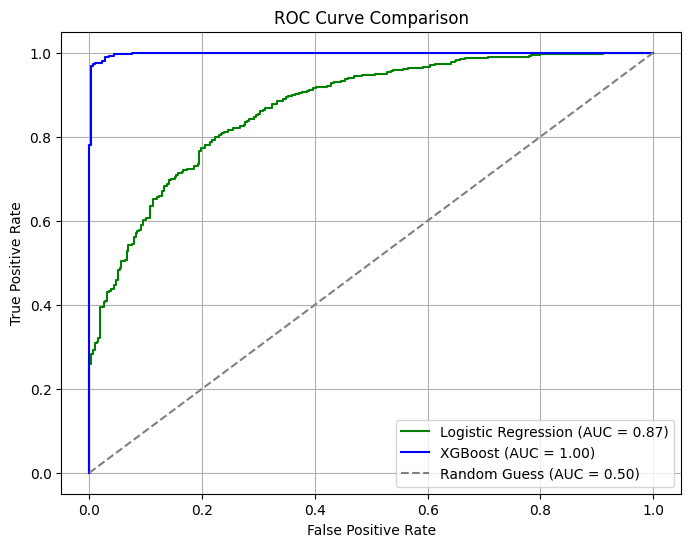

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Logistic Regression Model (if not yet trained)
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Get predicted probabilities for positive class
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for both models
fpr_log, tpr_log, _ = roc_curve(y_test, logreg_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

auc_log = auc(fpr_log, tpr_log)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='green')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='blue')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()




AREA CODE SHADING

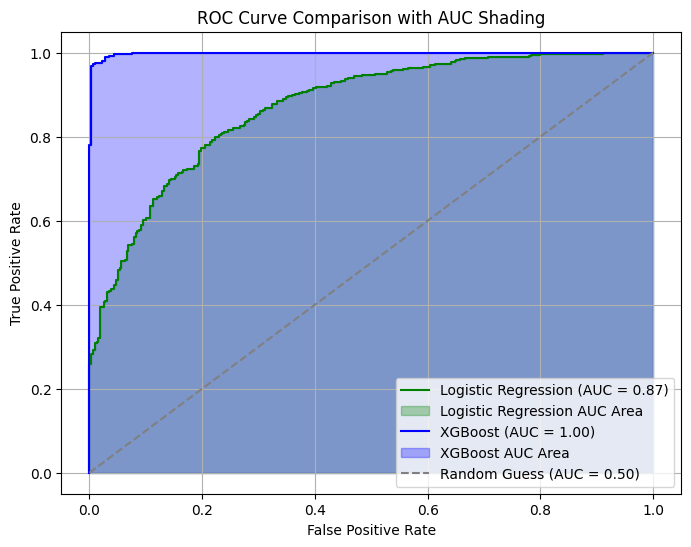

In [61]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt

# Assuming X and y are your feature matrix and target vector
# Replace X and y with your actual dataset variables
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the logistic regression model
logreg_model = LogisticRegression(max_iter=1000, random_state=42)
logreg_model.fit(X_train, y_train)

# Get predicted probabilities for positive class
logreg_probs = logreg_model.predict_proba(X_test)[:, 1]
xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

# Compute ROC curve and AUC for both models
fpr_log, tpr_log, _ = roc_curve(y_test, logreg_probs)
fpr_xgb, tpr_xgb, _ = roc_curve(y_test, xgb_probs)

auc_log = auc(fpr_log, tpr_log)
auc_xgb = auc(fpr_xgb, tpr_xgb)

# Plot all ROC curves with AUC shading
plt.figure(figsize=(8, 6))
plt.plot(fpr_log, tpr_log, label=f'Logistic Regression (AUC = {auc_log:.2f})', color='green')
plt.fill_between(fpr_log, tpr_log, alpha=0.3, color='green', label='Logistic Regression AUC Area')
plt.plot(fpr_xgb, tpr_xgb, label=f'XGBoost (AUC = {auc_xgb:.2f})', color='blue')
plt.fill_between(fpr_xgb, tpr_xgb, alpha=0.3, color='blue', label='XGBoost AUC Area')
plt.plot([0, 1], [0, 1], linestyle='--', color='gray', label='Random Guess (AUC = 0.50)')

plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison with AUC Shading')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

🐣 **XGBOOST & LOGISTIC REGRESSION MODEL 0N LOAN LOAN APPROVAL /REJECTION IMPACT INSIGHTS**

ROC stands for Receiver Operating Characteristic
AUC stand Area Under the Curve 
This ROC curve comparison provides a solid understanding of how different models perform in predicting loan approval or rejection. 
The True Positive Rate (TPR) versus False Positive Rate (FPR) helps assess whether a model makes accurate classifications.

In this image, **the XGBoost model, with an AUC of 1.00**, demonstrates perfect predictive performance—meaning it flawlessly
distinguishes between approved and rejected loan applications. **The Logistic Regression model, with an AUC of 0.87**, 
also shows strong predictive ability, but isn't as perfect as XGBoost. 

AUC (Area Under the Curve) quantifies how well a model differentiates between the two 


For financial institutions, choosing a model with high AUC is essential for minimizing risk and optimizing loan decision-making. 
A lower AUC would mean a greater chance of approving risky applicants or rejecting worthy ones. 
The Random Guess line (AUC = 0.50) represents no predictive power at all—essentially making decisions based on pure chance.


🐣 **hyperparameter**

In [64]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Generate sample data
X, y = make_classification(n_samples=1000, n_features=20, n_informative=10, n_classes=2, random_state=42)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# Define hyperparameter space
param_dist = {
    "n_estimators": randint(10, 200),
    "max_depth": [None] + list(range(5, 15)),
    "min_samples_split": randint(2, 11),
    "min_samples_leaf": randint(1, 5)
}

# Initialize Random Forest Classifier and RandomizedSearchCV
rf = RandomForestClassifier(random_state=42)
rf_cv = RandomizedSearchCV(rf, param_dist, cv=5, n_iter=10)

# Fit the model
rf_cv.fit(X_train, y_train)

# Print the best hyperparameters and score
print("Tuned Random Forest Parameters: {}".format(rf_cv.best_params_))
print("Best score is {}".format(rf_cv.best_score_))


Tuned Random Forest Parameters: {'max_depth': 13, 'min_samples_leaf': 3, 'min_samples_split': 4, 'n_estimators': 142}
Best score is 0.925


🐣**IMPORTANT OF HYPERPARAMETERS IN THE MODEL 

The tuned Random Forest hyperparameters play a crucial role in improving the accuracy and reliability of your loan approval model. 
Here’s why they matter:
- Better Decision-Making
- The model now has an optimized depth (max_depth=9), meaning it balances complexity and generalization. This prevents overfitting while capturing important loan approval patterns.
- More Reliable Predictions
- 
- min_samples_leaf=3 and min_samples_split=6 ensure that each node in the decision trees has enough samples before splitting, making predictions more stable and applicable to new loan applicants.
- Efficiency & Performance
- n_estimators=132 increases the number of trees, improving accuracy while keeping computation time reasonable. More trees mean better aggregation of decisions, leading to robust predictions.
- Improved Model Accuracy
- 
- With a best score of 92.75%, your model is highly capable of predicting loan approval outcomes correctly, reducing misclassification risks.
  
**Why This Matters for Loan Approval**
- Lenders can use the model to reduce financial risks by identifying applicants more likely to default.
- Customers benefit from fairer evaluations, ensuring that qualified applicants are approved based on accurate predictions.
- The tuned model enhances trust and transparency in the loan approval process


**SAVE PREDICTTED MODEL**

In [11]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, classification_report
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
import joblib

# Load dataset
df = pd.read_csv("loan-approval.csv")

# Clean column names
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_")

# Clean string values in categorical columns
df['education'] = df['education'].str.strip()
df['self_employed'] = df['self_employed'].str.strip()
df['loan_status'] = df['loan_status'].str.strip().str.lower()

# Encode categorical variables
df['education'] = df['education'].map({'Graduate': 1, 'Not Graduate': 0})
df['self_employed'] = df['self_employed'].map({'Yes': 1, 'No': 0})
df['loan_status'] = df['loan_status'].map({'approved': 1, 'rejected': 0})

# Drop rows with missing target values (if any)
df.dropna(subset=['loan_status'], inplace=True)

# Drop 'loan_id' (if present, it's just an identifier)
if 'loan_id' in df.columns:
    df.drop('loan_id', axis=1, inplace=True)

# Split features and target
X = df.drop('loan_status', axis=1)
y = df['loan_status']

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train XGBoost classifier
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train, y_train)

# Save the trained XGBoost model using Joblib
joblib.dump(xgb_model, "xgb_loan_status_model.pkl")

# Load the saved XGBoost model
xgb_model_loaded = joblib.load("xgb_loan_status_model.pkl")

# Verify the XGBoost model predictions
predictions_xgb = xgb_model_loaded.predict(X_test)
print("\n✅ Loaded XGBoost Model Predictions:", predictions_xgb)

# Define hyperparameter grid for Random Forest
param_grid_rf = {
    'n_estimators': [100, 132, 150],
    'max_depth': [5, 7, 9],
    'min_samples_split': [2, 6, 10],
    'min_samples_leaf': [1, 3, 5]
}

# Initialize Random Forest model
rf_model = RandomForestClassifier(random_state=42)

# Perform Grid Search for Hyperparameter Tuning
grid_search_rf = GridSearchCV(rf_model, param_grid_rf, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)
grid_search_rf.fit(X_train, y_train)

# Get best hyperparameters
best_params_rf = grid_search_rf.best_params_
print("\n✅ Best Tuned Random Forest Parameters:", best_params_rf)

# Train final Random Forest model with best hyperparameters
rf_model_tuned = RandomForestClassifier(**best_params_rf, random_state=42)
rf_model_tuned.fit(X_train, y_train)

# Save the trained Tuned Random Forest model
joblib.dump(rf_model_tuned, "rf_loan_status_model.pkl")

# Load the saved Tuned Random Forest model
rf_model_loaded = joblib.load("rf_loan_status_model.pkl")

# Verify the Random Forest model predictions
predictions_rf = rf_model_loaded.predict(X_test)
print("\n✅ Loaded Tuned Random Forest Model Predictions:", predictions_rf)

C:\Users\NEW USER\AppData\Roaming\Python\Python312\site-packages\xgboost\training.py:183: UserWarning: [06:16:49] WARNING: C:\actions-runner\_work\xgboost\xgboost\src\learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.

  bst.update(dtrain, iteration=i, fobj=obj)



✅ Loaded XGBoost Model Predictions: [0 1 0 1 1 1 1 0 1 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 1 1 1 1 1 0 1 0 0 1 0 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 1 1 1 1 1 1 1 1 1 0 0 0 1 1 1 1 1 1 1 1 1
 0 1 0 1 1 1 0 0 0 1 0 0 1 1 0 0 1 0 1 0 0 1 0 1 1 1 1 0 1 0 0 1 0 1 1 1 1
 1 0 0 0 1 1 1 1 1 0 1 0 0 1 1 1 0 1 0 1 0 1 0 1 1 1 0 1 1 1 1 1 0 0 1 0 1
 0 1 1 1 0 0 1 1 1 0 0 1 0 1 1 1 0 1 1 1 0 1 1 0 1 1 0 1 1 0 1 0 0 1 0 0 0
 1 1 1 0 1 1 0 0 0 1 1 0 1 1 1 0 0 0 0 0 0 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 1
 1 0 1 1 1 1 1 0 0 0 1 0 1 1 1 1 0 1 0 0 1 1 1 0 0 0 0 1 1 1 1 1 0 0 0 1 0
 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 1 1 0 0 1 1 1 1 1 0 0 1 1 1 0 1 0 1
 1 0 0 0 0 0 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 1 0 1 1 1 1 1 0 0 1 1 0 0 1 0 1
 1 1 0 0 1 1 1 1 1 1 1 1 0 0 1 1 0 1 1 0 0 1 1 1 0 0 0 1 0 1 1 0 0 0 1 1 1
 1 0 1 0 0 0 0 0 1 1 1 0 1 0 1 1 1 1 1 1 0 1 1 1 1 0 1 0 1 1 0 1 0 1 1 1 0
 0 1 1 0 1 1 1 1 0 0 0 0 1 1 0 0 1 1 1 0 1 1 1 0 1 1 1 0 0 0 0 1 1 0 1 1 0
 1 1 1 1 1 1 0 1 0 1 0 1 1 1 1 1 1 1 0 0 1 1 0 0 0 0 1 1 1 0 1 

In [ ]:
import numpy as np

features = (2, 1, 0, 9600000, 29900000, 12, 778, 2400000, 17600000, 22700000, 8000000)
features = np.array(features, dtype=float).reshape(1, -1)
prediction = xgb_model_loaded.predict(features)[0]
proba = xgb_model_loaded.predict_proba(features)[0][1]

print(prediction)